<h1 align=center > Loan Eligibility Analysing and Predicting </h1>

In [13]:
# import all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import sklearn.metrics as metrics
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.impute import SimpleImputer

In [14]:
df = pd.read_csv('data/loan_data_set.csv')
df.sample(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
242,LP001806,Male,No,0,Graduate,No,2965,5701.0,155.0,60.0,1.0,Urban,Y
270,LP001888,Female,No,0,Graduate,No,3237,0.0,30.0,360.0,1.0,Urban,Y
144,LP001508,Male,Yes,2,Graduate,No,11757,0.0,187.0,180.0,1.0,Urban,Y
330,LP002097,Male,No,1,Graduate,No,4384,1793.0,117.0,360.0,1.0,Urban,Y
132,LP001478,Male,No,0,Graduate,No,2718,0.0,70.0,360.0,1.0,Semiurban,Y
277,LP001904,Male,Yes,0,Graduate,No,3103,1300.0,80.0,360.0,1.0,Urban,Y
440,LP002408,Male,No,0,Graduate,No,3660,5064.0,187.0,360.0,1.0,Semiurban,Y
380,LP002226,Male,Yes,0,Graduate,NaN,3333,2500.0,128.0,360.0,1.0,Semiurban,Y
149,LP001520,Male,Yes,0,Graduate,No,4860,830.0,125.0,360.0,1.0,Semiurban,Y
446,LP002434,Male,Yes,2,Not Graduate,No,4652,0.0,110.0,360.0,1.0,Rural,Y


### Dimension of data

In [15]:
df.shape

(614, 13)

### How Many Null Values?

In [16]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### What type of data is?

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


### Data Cleaning

In [18]:
df.drop(columns=['Loan_ID'],inplace=True)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### Separate out Categorical and Numerical Features

In [19]:
cat_cols = df.select_dtypes(exclude=np.number).columns.to_list()
print("Categorical columns : ", cat_cols)

Categorical columns :  ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


In [20]:
num_cols = df.select_dtypes(include=np.number).columns.to_list()
print("Numerical columns : ", num_cols)

Numerical columns :  ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


In [32]:
num_df = df[num_cols]
num_df.sample(5)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
142,6950,0.0,175.0,180.0,1.0
551,2492,2375.0,NaN,360.0,1.0
271,11146,0.0,136.0,360.0,1.0
438,10416,0.0,187.0,360.0,0.0
563,5800,0.0,132.0,360.0,1.0


In [33]:
cat_df = df[cat_cols]
cat_df.sample(5)

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
598,Male,Yes,0,Graduate,Yes,Rural,Y
210,Female,No,0,Graduate,No,Semiurban,N
459,Male,Yes,0,Graduate,No,Semiurban,N
258,Male,Yes,0,Graduate,No,Rural,N
314,NaN,Yes,0,Graduate,No,Rural,N


<h1 align=center > Exploratory Data Analysis </h1>

### Univariate EDA

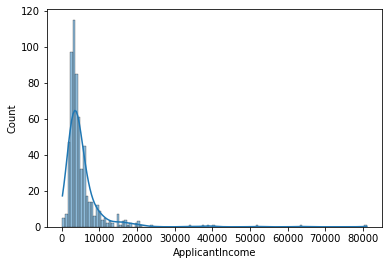

In [21]:
sns.histplot(df['ApplicantIncome'],kde=True);

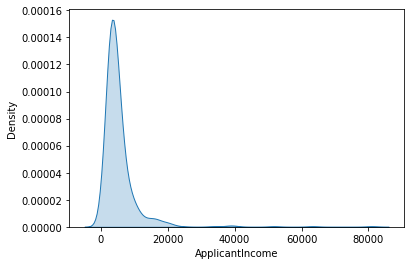

In [25]:
sns.kdeplot(df['ApplicantIncome'],fill=True);

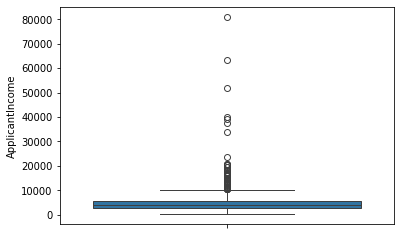

In [26]:
sns.boxplot(df['ApplicantIncome']);

In [28]:
df['ApplicantIncome'].skew()

6.539513113994625

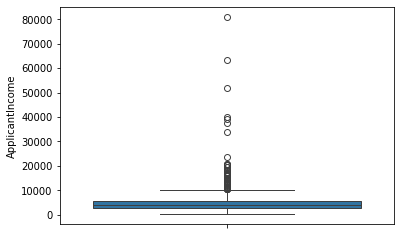

In [35]:
sns.boxplot(num_df.iloc[:,0]);

In [39]:
len(num_df.columns)

5

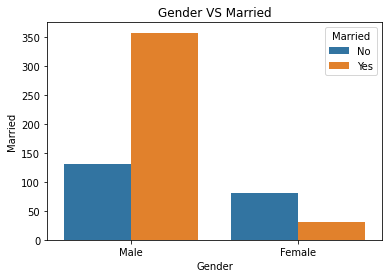

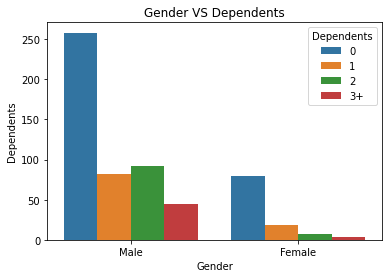

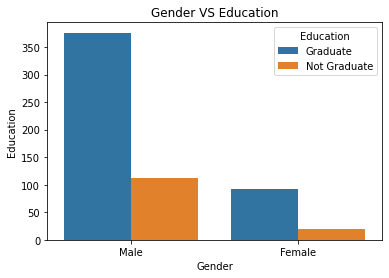

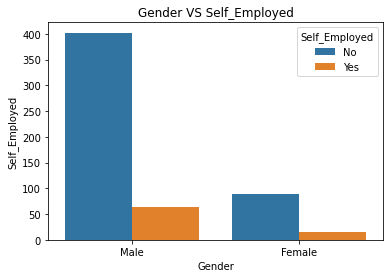

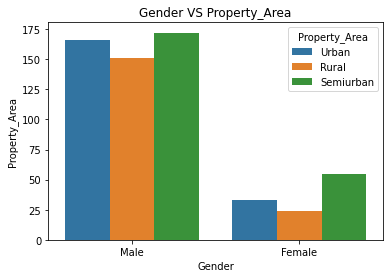

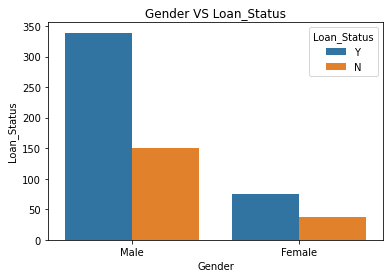

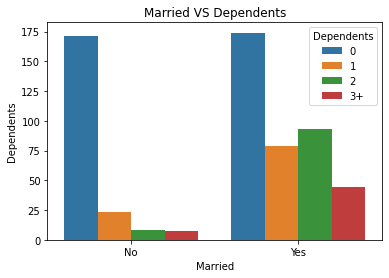

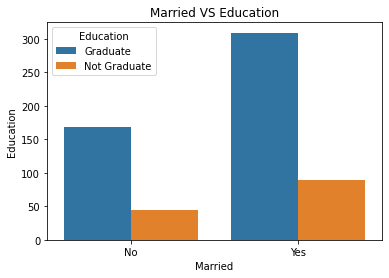

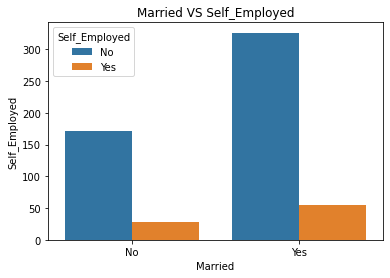

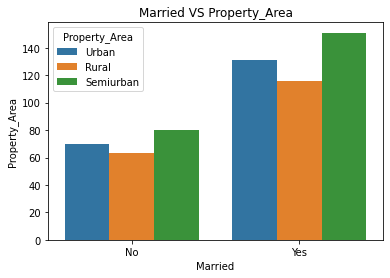

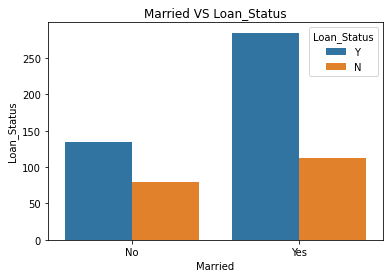

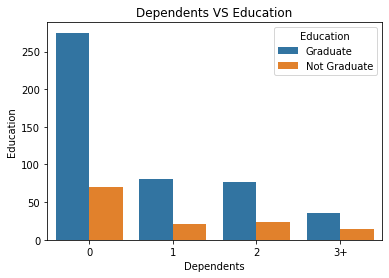

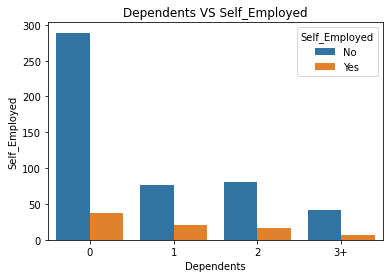

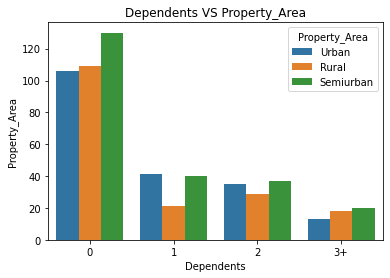

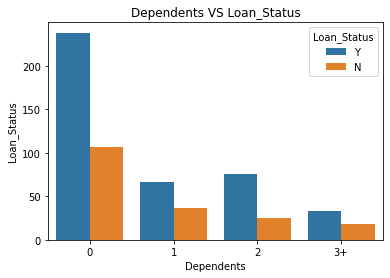

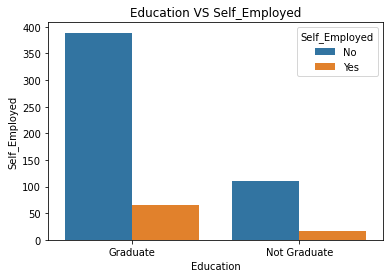

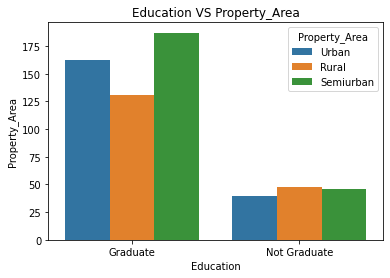

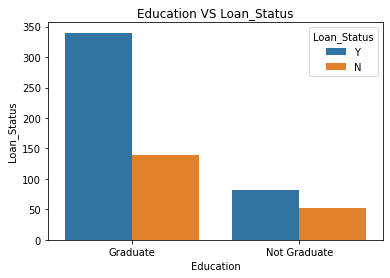

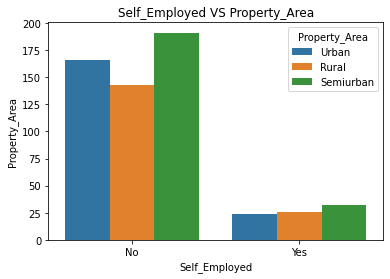

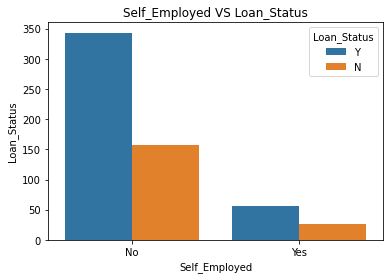

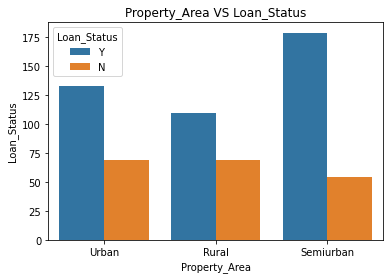

In [45]:
for row in range(len(cat_df.columns)-1):
    for col in range(row+1, len(cat_df.columns)):
        sns.countplot(x=cat_df.iloc[:, row], hue=cat_df.iloc[:, col])        
        plt.xlabel(cat_df.columns[row])
        plt.ylabel(cat_df.columns[col])
        plt.title(f'{cat_df.columns[row]} VS {cat_df.columns[col]}')
        plt.show()
